In [45]:
#Setting Up Your Analysis Environment

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [47]:
df = pd.read_csv('chipotle.csv')

In [48]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# Data Wrangling

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [50]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [51]:
#Converting the item_price to a numeric format

#df['item_price']= df['item_price'].str.replace('$', '').str.replace(',', '').astype(float)

df['item_price'] = df['item_price'].str.replace('$', '').astype(float)


C:\Users\GOODNEWS\AppData\Local\Temp\ipykernel_11656\3492441233.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] = df['item_price'].str.replace('$', '').astype(float)


In [52]:
df['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [53]:
#handle missing values:
df['choice_description'].fillna('None', inplace=True)

In [54]:
df['choice_description']

0                                                    None
1                                            [Clementine]
2                                                 [Apple]
3                                                    None
4       [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
                              ...                        
4617    [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...
4618    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
4619    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
4620    [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...
4621    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
Name: choice_description, Length: 4622, dtype: object

# Sales Analysis

In [67]:
#Performing a sales analysis to identify popular items and customer preferences:

# Calculate total sales for each item
item_sales = df.groupby('item_name')['item_price'].sum().sort_values(ascending = False)



In [68]:
item_sales

item_name
Chicken Bowl                             7342.73
Chicken Burrito                          5575.82
Steak Burrito                            3851.43
Steak Bowl                               2260.19
Chips and Guacamole                      2201.04
Chicken Salad Bowl                       1228.75
Chicken Soft Tacos                       1108.09
Veggie Burrito                            934.77
Barbacoa Burrito                          894.75
Veggie Bowl                               867.99
Carnitas Bowl                             736.71
Barbacoa Bowl                             672.36
Carnitas Burrito                          597.83
Steak Soft Tacos                          536.05
Chips                                     494.34
Chicken Crispy Tacos                      472.13
Canned Soft Drink                         438.75
Carnitas Soft Tacos                       375.94
Chips and Fresh Tomato Salsa              361.36
Steak Crispy Tacos                        357.34
6 Pack Sof

In [70]:
# Calculate frequency of each item sold
item_frequency = df['item_name'].value_counts()
item_frequency

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

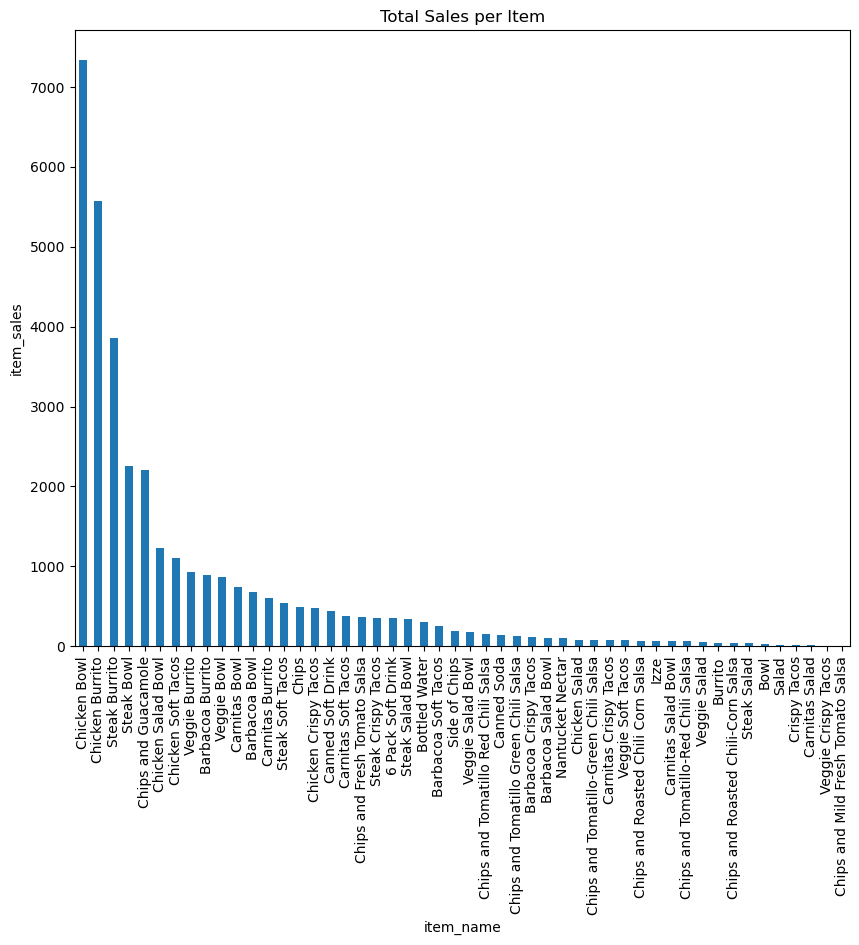

In [78]:
# Plot total sales for each item
plt.figure(figsize=(10,8))
item_sales.plot(kind='bar', xlabel='item_name', ylabel='item_sales', title='Total Sales per Item')
plt.show()

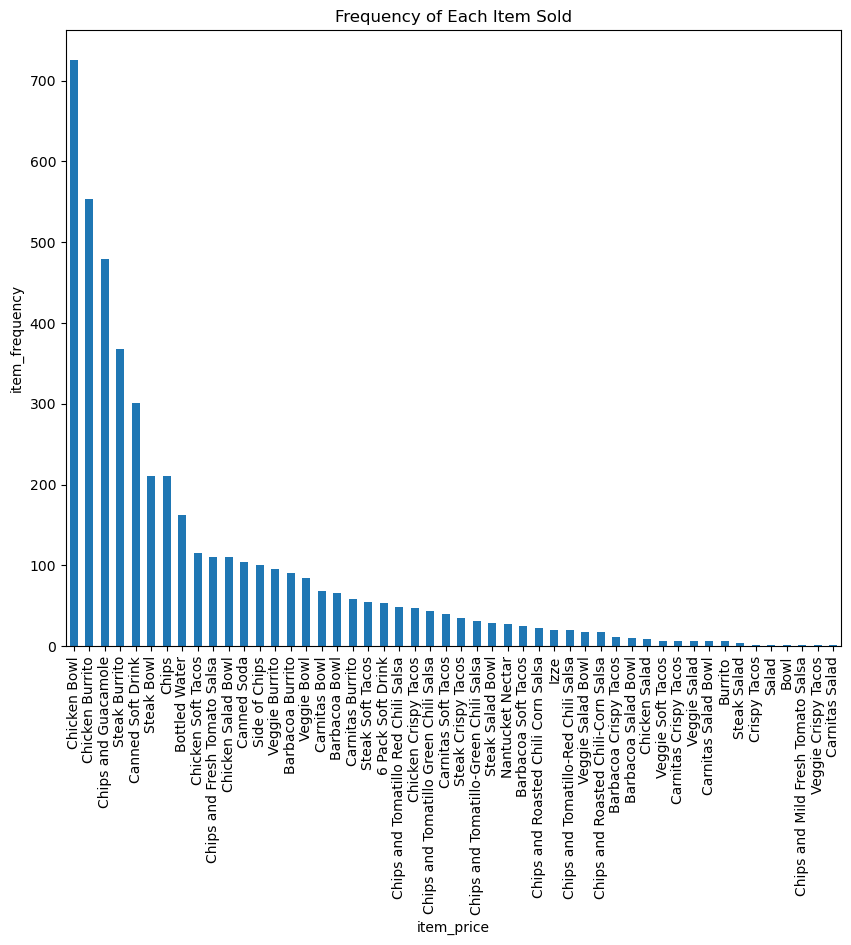

In [76]:
# Plot frequency of each item sold
plt.figure(figsize=(10,8)) #increase the fiqure size
item_frequency.plot(kind='bar', xlabel='item_price', ylabel='item_frequency', title='Frequency of Each Item Sold')
plt.xticks(rotation = 90) # rotate x-axis labels to prevent overlap
plt.show()

In [79]:
sales_analysis = df.groupby('item_name').agg(
    Total_Order=pd.NamedAgg(column='quantity', aggfunc='sum'),
    Total_Sales=pd.NamedAgg(column='item_price', aggfunc='sum')
).reset_index().sort_values(by='Total_Sales', ascending=False) 

# First the Group BY func,Each unique item name in your DataFrame will form a group.
#Within each group (item), two aggregate calculations are made: total order and total sales
#pd.NamedAgg is used to create a named aggregation, which means it performs the specified aggregation function (aggfunc='sum')
#and assigns a custom name (Total_Order and Total_Sale) to the resulting columns.

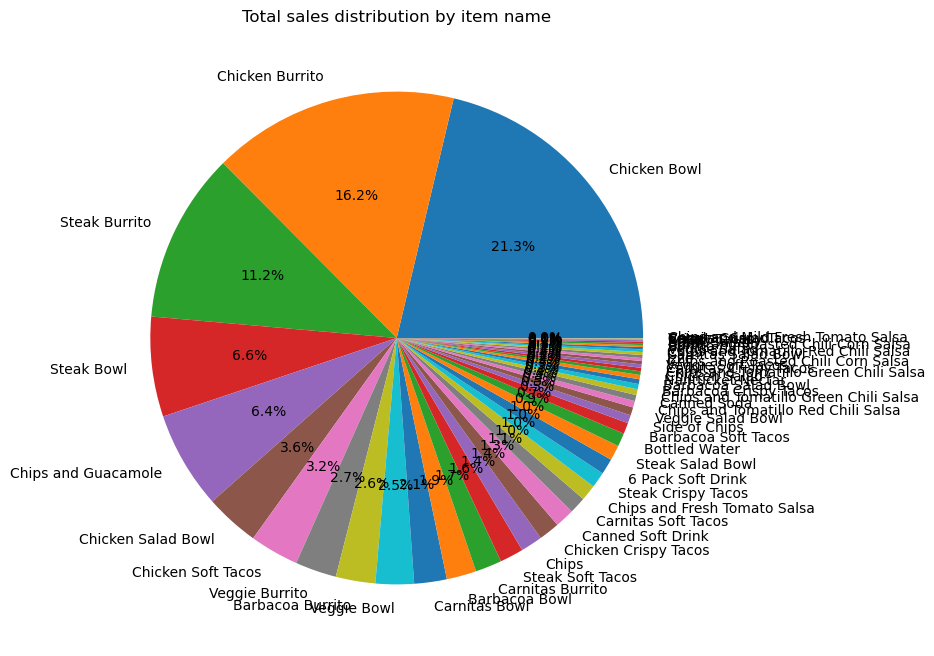

In [80]:
plt.figure(figsize=(10,8))
plt.pie(sales_analysis['Total_Sales'], labels=sales_analysis['item_name'], autopct="%1.1f%%")
plt.title('Total sales distribution by item name')
plt.show()

#autopct="%1.1f%%": This parameter formats the percentage value that appears on each segment of the pie chart.
#The format specifier "%1.1f%%" indicates that the percentage should be displayed with one decimal place. 
#This auto percentage calculation shows what fraction of the total each segment represents, making it easier to understand 
#the relative size of each item's sales in a visual format.

The chart highlights which menu items are contributing the most to the business's revenue, with the size of each slice corresponding to the proportion of total sales for that item.

It also provides insights into customer preferences and helps the management to make data-driven decisions about which items to promote, stock more of, or even consider pricing strategies. 

For example, the vendor might want to ensure that high-selling items like the Chicken Bowl and Chicken Burrito are always available and may consider introducing variations of these items or bundling them with drinks or sides as part of a combo to increase sales further.

# Predicting Order Quantity with Linear Regression

In [82]:
#Data Preparation
order_data = df[['item_price']] # creates a DataFrame order_data that consists of only the 'item_price' column from the df dataframe
#In the context of machine learning, this can be considered as the feature(s) you want to use to predict an outcome.
order_quantity = df['quantity'] #target variable

X_train, X_test, y_train, y_test = train_test_split(order_data, order_quantity, test_size=0.2, random_state=42) 



In [83]:
#Initializing the linear regression model
lin_reg = LinearRegression() 
#creates an instance of the LinearRegression class and assigns it to the variable lin_reg.

#Training the model
lin_reg.fit(X_train, y_train) 
#The .fit() method takes the training data X_train (features) and y_train (target) as arguments. 
#It calculates the optimal model parameters (coefficients for each feature and the intercept) that 
#best fit the training data in a least squares sense.

# Making Prediction 
y_pred = lin_reg.predict(X_test)
#The .predict() method takes new input data (X_test) and returns the model's predictions (y_pred) for this data. 
#These predictions are based on the coefficients learned during the training phase.

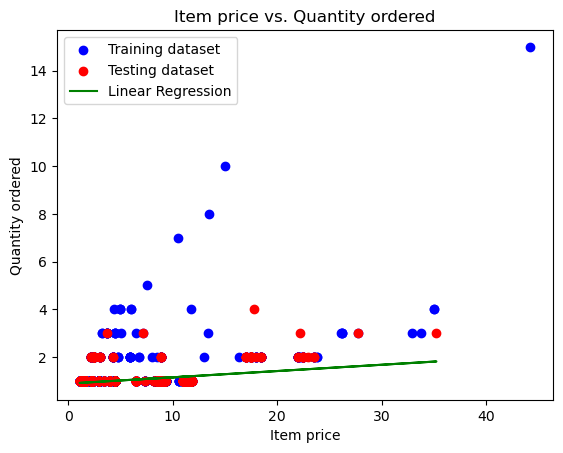

In [84]:
plt.scatter(X_train, y_train, color='blue', label='Training dataset') #Plot the training data
plt.scatter(X_test, y_test, color='red', label='Testing dataset') #Plot the testing data
plt.plot(X_test, y_pred, color='green', label='Linear Regression') #plotting the regression model line
plt.xlabel("Item price")
plt.ylabel('Quantity ordered')
plt.title('Item price vs. Quantity ordered')
plt.legend()
plt.show() 

In the scatter plot, we can observe:
- Blue dots representing the training dataset, which is the data used to develop the linear regression model.
- Red dots representing the testing dataset, which is a separate set of data used to evaluate the model's performance.
- A green line depicting the linear regression model, which represents the predicted relationship between item price and quantity ordered.
The plot shows that as the item price increases, the quantity ordered tends to remain relatively stable, with no significant decrease that might be expected if price were a major deterrent to the quantity purchased. This could indicate that for this particular vendor, customers are not highly sensitive to price changes, or it may reflect a price range that is acceptable to the vendor's target market.

The linear regression model, indicated by the green line, provides a predictive insight into how many items are likely to be ordered at different price points. The model seems to suggest only a slight negative relationship between price and quantity ordered, implying that price changes within the range present in the data do not have a major impact on the quantity sold.

For the food vendor, this information can be instrumental in making pricing decisions. If the vendor is considering raising prices, this model suggests that a slight increase might not significantly reduce the quantity of items ordered. However, it's also important to consider other factors not included in this analysis, such as competition, customer loyalty, and price elasticity of demand for different items.

# Customer Segmentation with k-Means Clustering

To better understand your customer base, segment them based on their ordering behavior using k-Means clustering:

C:\Users\GOODNEWS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


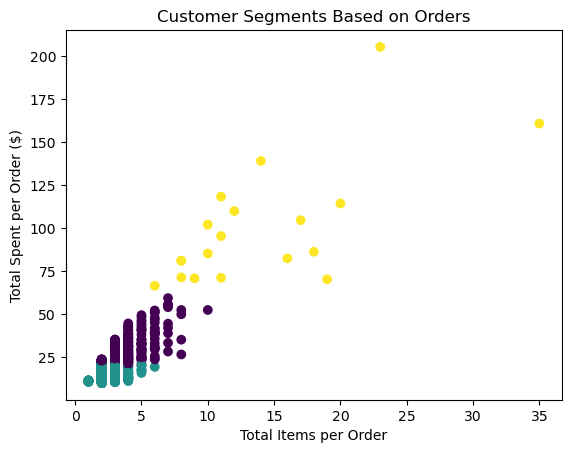

In [85]:
order_data = df.groupby('order_id').agg(
    Total_Items=pd.NamedAgg(column='quantity', aggfunc='sum'),
    Total_Spent=pd.NamedAgg(column='item_price', aggfunc='sum')
).reset_index()

kmeans = KMeans(n_clusters=3)
order_segments = kmeans.fit_predict(order_data[['Total_Items', 'Total_Spent']])

plt.scatter(order_data['Total_Items'], order_data['Total_Spent'], c=order_segments, cmap='viridis')
plt.xlabel('Total Items per Order')
plt.ylabel('Total Spent per Order ($)')
plt.title('Customer Segments Based on Orders')
plt.show()

The different colors of the dots indicate different customer segments as identified by the k-Means algorithm. This type of analysis allows the food vendor to categorize customers into segments based on their purchasing behavior, which can be highly valuable for personalized marketing and sales strategies.

From the plot, we can discern:
- A cluster (in purple) of orders with a small number of items and lower total spend. This group might consist of individual customers or small orders.
- Another cluster (in yellow) shows a slight increase in both the number of items and the total spend, possibly representing small groups or customers purchasing more expensive items.
- A third cluster (in light blue) represents orders with a higher number of items and a higher total spend, which could be large groups or high-value orders.

The vendor can use this information to tailor marketing campaigns, menu adjustments, and service offerings to each segment's likely preferences and spending habits. For example, targeted promotions could be sent to the high-value segment to encourage repeat business, or loyalty programs could be developed for those who make frequent small purchases.
This visualization demonstrates the usefulness of clustering for understanding the diversity within a customer base and highlights the importance of segmenting customers to better meet their needs and drive sales growth.